In [1]:
import numpy as np
import os
from datetime import datetime

from sklearn.model_selection import train_test_split

import tensorflow as tf

from dataset_utils import create_pairs, PairDataGenerator
from utils import compile_and_fit
from model import siameseLeg, siameseNet



In [2]:
ROOT_DIR = 'C:/Users/KK/Desktop/Site-similar/dataset'  # To Fix according to your path
BATCH_SIZE = 30
IMG_HEIGHT = 224
IMG_WIDTH = 224
CHANNELS = 3
neg_factor = 3
X, y = create_pairs(ROOT_DIR, neg_factor)

POSITIVES CREATED:  9940
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose from an empty sequence
Cannot choose

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
train_gen = PairDataGenerator(X_train, y_train, IMG_HEIGHT, IMG_WIDTH, CHANNELS, BATCH_SIZE)
val_gen = PairDataGenerator(X_val, y_val, IMG_HEIGHT, IMG_WIDTH, CHANNELS, BATCH_SIZE)

In [5]:
print("TRAIN: ", X_train.shape)
print("VAL: ", X_val.shape)

TRAIN:  (29820, 2)
VAL:  (9940, 2)


In [6]:
tl, cl = np.unique(y_train, return_counts=True)
print("TRAIN - LABEL: {} NUM: {} LABEL: {} NUM: {}".format(tl[0], cl[0], tl[1], cl[1]))

TRAIN - LABEL: 0.0 NUM: 22419 LABEL: 1.0 NUM: 7401


In [7]:
weight_for_0 = (1 / cl[0]) * (len(y_train)) / 2.0
weight_for_1 = (1 / cl[1]) * (len(y_train)) / 2.0
class_weight = {0: weight_for_0, 1: weight_for_1}
print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.67
Weight for class 1: 2.01


In [8]:
initial_bias = np.log([cl[1] / cl[0]])
print("Initial Bias: ".format(initial_bias[0]))

Initial Bias: 


In [9]:
tl, cl = np.unique(y_val, return_counts=True)
print("VAL - LABEL: {} NUM: {} LABEL: {} NUM: {}".format(tl[0], cl[0], tl[1], cl[1]))

VAL - LABEL: 0.0 NUM: 7401 LABEL: 1.0 NUM: 2539


In [10]:
siamese_model = tf.keras.models.load_model('./saved_model/20211105/')

In [11]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
LeftInput (InputLayer)          [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
RightInput (InputLayer)         [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
SiameseLeg (Functional)         (30, 512)            14714688    LeftInput[0][0]                  
                                                                 RightInput[0][0]                 
__________________________________________________________________________________________________
dense (Dense)                   (30, 256)            131328      SiameseLeg[0][0]    

In [12]:
date = datetime.now().strftime("%Y%m%d-%H%M%S")
fit_logdir = "logs/fit/" + date

In [13]:
from tensorflow import keras

In [23]:
history = siamese_model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=5,  # чем больше, тем больше риск переобучения
        #callbacks=get_callbacks(fit_logdir),
        shuffle=False,
        class_weight=class_weight,
        verbose=1)

MODEL_DIR = './saved_model_new'
version = datetime.today().strftime("%Y%m%d")
export_path = os.path.join(MODEL_DIR, version)

siamese_model.save(export_path)

print('MODEL SAVED AT: {}\n'.format(export_path))

Epoch 1/20
994/994 [==============================] - 894s 899ms/step - loss: 0.3841 - binary_accuracy: 0.8949 - Recall: 0.8722 - Precision: 0.7089 - AUC: 0.9491 - R_P80: 0.7841 - R_P90: 0.6079 - R_P95: 0.4268 - val_loss: 0.3913 - val_binary_accuracy: 0.8726 - val_Recall: 0.8003 - val_Precision: 0.7160 - val_AUC: 0.9278 - val_R_P80: 0.7085 - val_R_P90: 0.4927 - val_R_P95: 0.3671
Epoch 2/20
994/994 [==============================] - 895s 900ms/step - loss: 0.3844 - binary_accuracy: 0.8965 - Recall: 0.8746 - Precision: 0.7046 - AUC: 0.9492 - R_P80: 0.7842 - R_P90: 0.6218 - R_P95: 0.4405 - val_loss: 0.4294 - val_binary_accuracy: 0.8749 - val_Recall: 0.8454 - val_Precision: 0.6550 - val_AUC: 0.9254 - val_R_P80: 0.6832 - val_R_P90: 0.4659 - val_R_P95: 0.2564
Epoch 3/20
994/994 [==============================] - 885s 890ms/step - loss: 0.3722 - binary_accuracy: 0.8995 - Recall: 0.8762 - Precision: 0.7148 - AUC: 0.9532 - R_P80: 0.8014 - R_P90: 0.6414 - R_P95: 0.4828 - val_loss: 0.4230 - val_b

INFO:tensorflow:Assets written to: ./saved_model_new\20211106\assets


INFO:tensorflow:Assets written to: ./saved_model_new\20211106\assets


MODEL SAVED AT: ./saved_model_new\20211106



In [25]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'Recall', 'Precision', 'AUC', 'R_P80', 'R_P90', 'R_P95', 'val_loss', 'val_binary_accuracy', 'val_Recall', 'val_Precision', 'val_AUC', 'val_R_P80', 'val_R_P90', 'val_R_P95'])

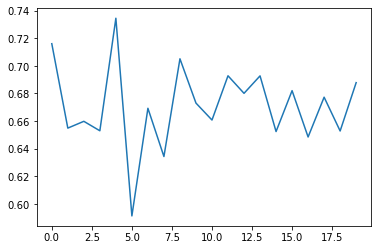

In [35]:
plt.plot(history.history['val_Precision'])

Similarity is :  [[0.04106661]]


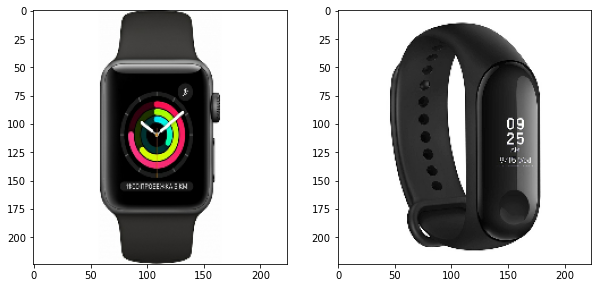

In [53]:
img_path_one = "../ЧАСЫ/1.jpg"
img_path_two = "../ЧАСЫ/4.jpg"

img_one = tf.io.read_file(img_path_one)
img_one = tf.image.convert_image_dtype(tf.io.decode_png(img_one, channels=3), dtype='float32')  # * 1./255
img_one = tf.image.resize(img_one, (224, 224), method=tf.image.ResizeMethod.BILINEAR)
img_one_final = tf.expand_dims(img_one, 0)

img_two = tf.io.read_file(img_path_two)
img_two = tf.image.convert_image_dtype(tf.io.decode_png(img_two, channels=3), dtype='float32')  # * 1./255
img_two = tf.image.resize(img_two, (224, 224), method=tf.image.ResizeMethod.BILINEAR)
img_two_final = tf.expand_dims(img_two, 0)


print("Similarity is : ", siamese_model.predict([img_one_final, img_two_final]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ax1.imshow(img_one[:, :, :].numpy())
ax2.imshow(img_two[:, :, :].numpy())
#plt.suptitle("The two tested objects are " + str(similarity), y=0.7)
plt.show()